In [12]:
%autoreload 2
import sys
sys.path.append('src')
import sqra
import matplotlib.pyplot as plt
import numpy as np
import hittingprob
import copy

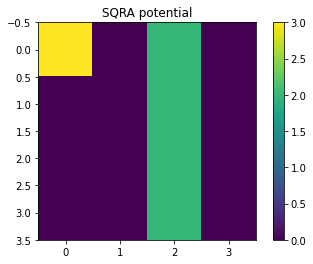

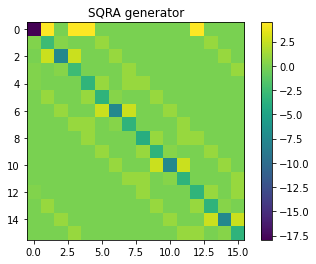

In [3]:
nx = 4
ny = 4
N = nx*ny
torus = True
T = 2

U = np.zeros((ny,nx))

U[0,0] = 3
U[:,2] = 2
#U[0,0]=1

s = sqra.Sqra(U, torus=True)
s.plot()

In [4]:
p0 = hittingprob.HittingProbOptimization(s, [T])

print(p0.hpmin)

0.0906816942168947


In [5]:
from copy import copy
import optimizers
adam = optimizers.Adam()
adam2 = optimizers.Adam(h=0.1, beta1=0.8, beta2=.95)
rprop = optimizers.Rprop()
#momentum = optimizers.Momentum(h=0.1, alpha=0.8)
momentum = optimizers.Momentum()
rms = optimizers.RMSProp(h=0.1, gamma=0.9)
nm = optimizers.ScipyOpt(method='Nelder-Mead')

optims = [adam2, rprop]

#optims = [rprop]
subders = [1,3]
smss = [30]

problems = []

for opt in optims:
    for maxsubder in subders:
        for sms in smss:


            p = hittingprob.HittingProbOptimization(s, [T], penalty=0.01, optimizer=copy(opt), maxsubder=maxsubder, verbose=True, softminscale=sms )
            problems.append(p)



hp:0.0906816942168947, cost:0.0, obj:0.0906816942168947
hp:0.090773632489943, cost:0.0, obj:0.090773632489943
hp:0.0906816942168947, cost:0.0, obj:0.0906816942168947
hp:0.090773632489943, cost:0.0, obj:0.090773632489943


In [6]:
maxopt = len(problems)
#maxopt = 2

In [7]:
for p in problems[0:maxopt]:
    print(p.optim, p.maxsubder)
    %time p.optim.run(200)


3154121, cost:0.0016036806919257588, obj:0.09114954153961545
hp:0.09275322223154059, cost:0.0016036806919255348, obj:0.09114954153961505
hp:0.09275322223154026, cost:0.0016036806919254235, obj:0.09114954153961483
hp:0.09275322223154055, cost:0.0016036806919254463, obj:0.0911495415396151
hp:0.09275322223154071, cost:0.0016036806919254732, obj:0.09114954153961524
hp:0.09275322223154067, cost:0.001603680691925506, obj:0.09114954153961517
hp:0.0927532222315408, cost:0.0016036806919254327, obj:0.09114954153961537
hp:0.09275322223154092, cost:0.001603680691925401, obj:0.09114954153961552
hp:0.0927532222315399, cost:0.0016036806919253633, obj:0.09114954153961453
hp:0.09275322223154034, cost:0.001603680691925358, obj:0.09114954153961498
hp:0.0927532222315408, cost:0.0016036806919253316, obj:0.09114954153961546
hp:0.09275322223153973, cost:0.0016036806919253203, obj:0.09114954153961441
hp:0.09275322223154088, cost:0.0016036806919252963, obj:0.09114954153961559
hp:0.0927532222315408, cost:0.0016

In [8]:
prbs = np.reshape(problems, (len(optims), len(subders), len(smss)))

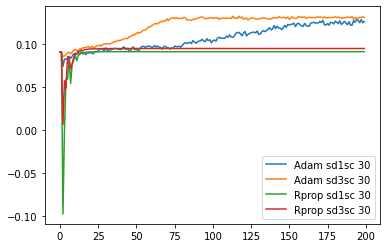

In [9]:
selprob = prbs[:, :,:].flatten()

plt.plot(np.vstack([(p.histobj[0:200]) for  p in selprob]).T)
plt.legend([p.describe() for p in selprob])

In [13]:

for p in problems:
    pp = copy.deepcopy(p)
    pp.maxsubder = 1
    print(p.describe())
    pp.perturb(pp.x)

Adam sd1sc 30
hp:0.23344955669561393, cost:0.1078649129417659, obj:0.12558464375384804
Adam sd3sc 30
hp:0.2405490135266192, cost:0.10930632073555786, obj:0.13124269279106132
Rprop sd1sc 30
hp:0.09275322223153994, cost:0.0016036806919252366, obj:0.0911495415396147
Rprop sd3sc 30
hp:0.11338179482984281, cost:0.0185465222659115, obj:0.09483527256393132


In [14]:
accuracies = np.logspace(np.log10(0.8),0,20)
hittings = np.zeros((len(problems), len(accuracies)))


best = 0
for p in problems:
    best = max(best, np.max(p.histobj))

for i, p in enumerate(problems):
    for j, accuracy in enumerate(accuracies):
        h = np.where(p.histobj >= best * accuracy)[0]
        if h.size == 0:
            h = np.nan
        else:
            h = h[0]
        hittings[i,j] = h
hittings
        
    



array([[ 96., 104., 109., 111., 115., 115., 117., 129., 136., 137., 137.,
        140., 149., 153., 165., 170., 194.,  nan,  nan,  nan],
       [ 42.,  45.,  46.,  47.,  48.,  50.,  53.,  54.,  56.,  57.,  58.,
         60.,  61.,  62.,  65.,  68.,  70.,  72.,  76., 117.],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

In [15]:
accuracies

array([0.8       , 0.80945091, 0.81901346, 0.82868899, 0.83847882,
       0.8483843 , 0.8584068 , 0.8685477 , 0.87880841, 0.88919033,
       0.8996949 , 0.91032356, 0.92107779, 0.93195907, 0.94296889,
       0.95410878, 0.96538027, 0.97678492, 0.9883243 , 1.        ])

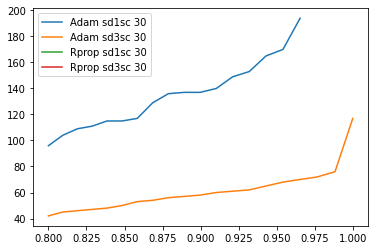

In [16]:
plt.plot(accuracies, hittings.T)
plt.legend([p.describe() for p in problems])

In [17]:
from copy import deepcopy
rp3 = deepcopy(problems[3])

optimizer:  <optimizers.Adam object at 0x118fe2820> maxsubder 1
hp:0.23344955669561393, cost:0.1078649129417659, obj:0.12558464375384804


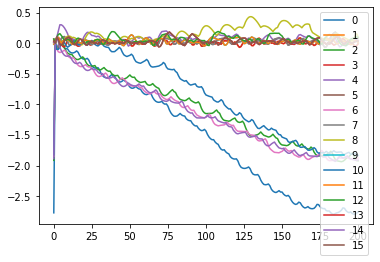

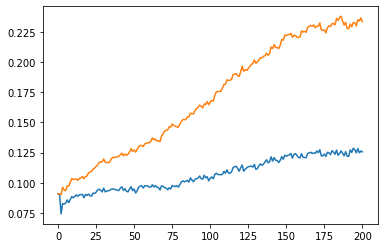

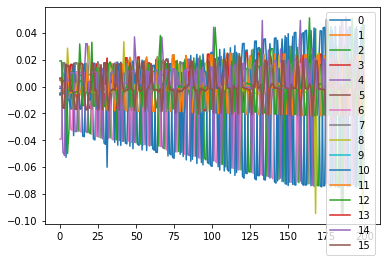

optimizer:  <optimizers.Adam object at 0x118fe2ca0> maxsubder 3
hp:0.24076540245478664, cost:0.10930632073555786, obj:0.13145908171922877


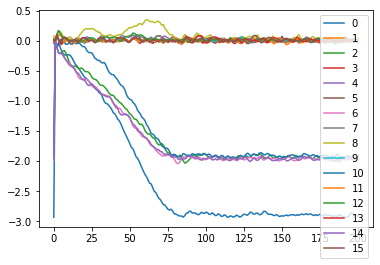

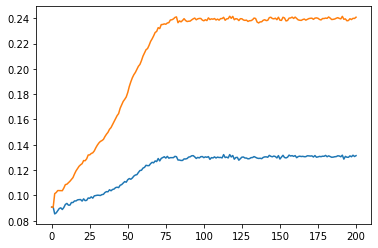

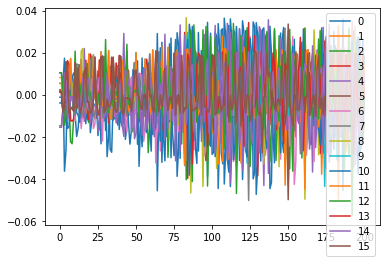

optimizer:  <optimizers.Rprop object at 0x118fe2fd0> maxsubder 1
hp:0.09275322223153994, cost:0.0016036806919252366, obj:0.0911495415396147


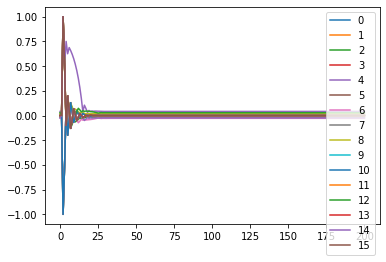

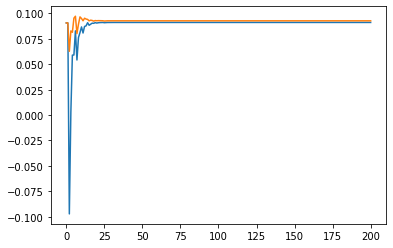

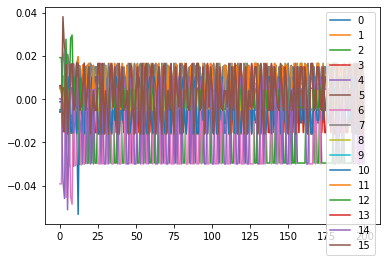

optimizer:  <optimizers.Rprop object at 0x118fdd1f0> maxsubder 3
hp:0.11338179482984387, cost:0.0185465222659115, obj:0.09483527256393237


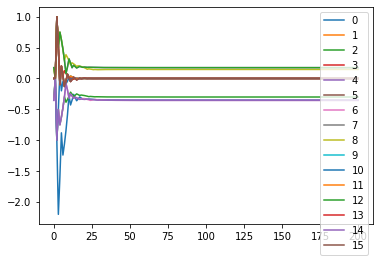

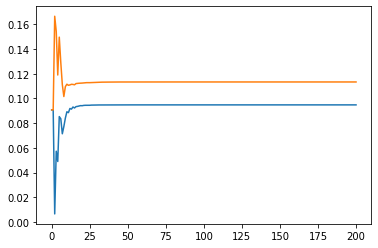

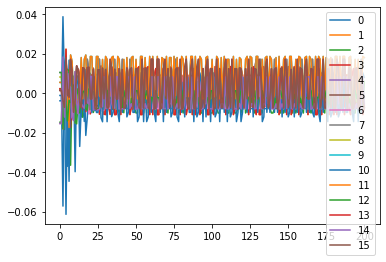

In [18]:
for p in problems[0:maxopt]:
    print("optimizer: ",p.optim, "maxsubder",p.maxsubder)
    p.print_status()
    p.plot_xhist()
    p.plot_objhist()
    p.plot_derivatives()

In [19]:
for p in problems[0:maxopt]:
    print("optimizer: ",p.optim, "maxsubder",p.maxsubder)
    p.print_status()

optimizer:  <optimizers.Adam object at 0x118fe2820> maxsubder 1
hp:0.23344955669561393, cost:0.1078649129417659, obj:0.12558464375384804
optimizer:  <optimizers.Adam object at 0x118fe2ca0> maxsubder 3
hp:0.24076540245478664, cost:0.10930632073555786, obj:0.13145908171922877
optimizer:  <optimizers.Rprop object at 0x118fe2fd0> maxsubder 1
hp:0.09275322223153994, cost:0.0016036806919252366, obj:0.0911495415396147
optimizer:  <optimizers.Rprop object at 0x118fdd1f0> maxsubder 3
hp:0.11338179482984387, cost:0.0185465222659115, obj:0.09483527256393237


In [20]:
p = problems[1]

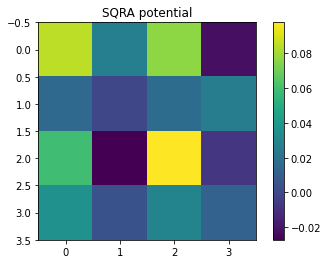

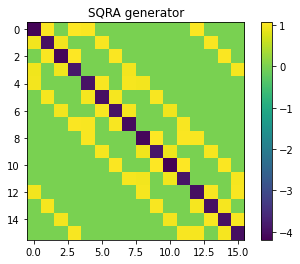

In [21]:
p.sqra_perturbed.plot()

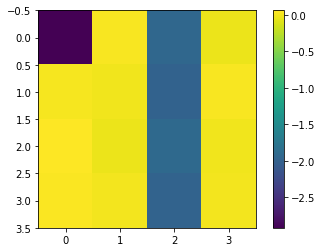

In [22]:
plt.imshow(p.x.reshape(4,4))
plt.colorbar()

In [23]:
pr = problems[2]
pr.describe()

'Rprop sd1sc 30'

In [136]:
#pr.perturb(p.x)
#pr.perturb(np.zeros(16))

a = 1
pr.perturb(a * x1 + (1-a) * x2)

In [141]:
pr.optim = copy.copy(rprop)
pr.optim.g = np.random.rand(16) / 10
pr.optim.dec= 0.8

pr.optim = copy.copy(adam2)
pr.optim.h=1
pr.optim.beta1 = 0.99
pr.optim.beta2 = 0.999
pr.optim.initialize(f=pr.objcall, df=pr.dobjcall, x0=pr.x)

pr.maxsuber=1
pr.softminscale = 5
pr.verbose=False

In [142]:
pr.optim.min = 1e-12

In [147]:
for i in range(1000):
    clear_output(wait=True)
    pr.optim.run(3)
    plt.plot(pr.histobj[-2000:-1])
    plt.show()

KeyboardInterrupt: 

In [45]:
x1 = pr.x
x2 = p.x

In [51]:
pr.perturb((x1))
pr.perturb((x2))
pr.perturb((x1 + x2)/2)

hp:0.09102404080506525, cost:0.00024219448270201995, obj:0.09078184632236323
hp:0.2405490135266192, cost:0.10930632073555786, obj:0.13124269279106132
hp:0.1542480482766387, cost:0.054755808216606375, obj:0.09949224006003234


In [56]:
for a in [1, .999, .9, .5, 0]:

    pr.perturb(a * x1 + (1-a) * x2)
    print(pr.dobj)

hp:0.09102404080506525, cost:0.00024219448270201995, obj:0.09078184632236323
[ 0.00876961 -0.00456939 -0.01486309 -0.00456937 -0.00463552  0.00394439
 -0.02926508  0.00394439  0.01467265 -0.0048378   0.00442195 -0.0048377
  0.00915146 -0.0037331   0.01013957 -0.00373299]
hp:0.0911261159160818, cost:0.0003388493261706687, obj:0.09078726658991114
[ 0.00876809 -0.00456426  0.00513008 -0.00456393 -0.00463091  0.00393953
 -0.0293037   0.00393945  0.01467832  0.01516718  0.00441456 -0.00483282
  0.00917047 -0.00372642  0.01014075 -0.00372638]
hp:0.10151569830121374, cost:0.01111539820144519, obj:0.09040030009976854
[ 0.00897124 -0.01581332 -0.03271633  0.00420938 -0.00322628  0.01517662
  0.00402    -0.00484608  0.00872006  0.01699892  0.01043515  0.01697993
 -0.00327607 -0.00482222  0.00402168 -0.00483266]
hp:0.1542480482766387, cost:0.054755808216606375, obj:0.09949224006003234
[ 0.00938481 -0.01807861 -0.05074122  0.00205442 -0.00046063  0.01707573
  0.00082513 -0.00307328  0.01696368  0.

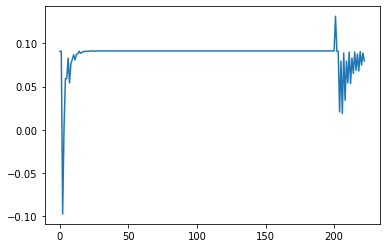

In [31]:
plt.plot(pr.histobj)

In [36]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

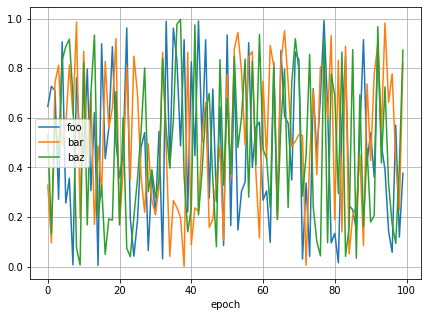

In [37]:
data = collections.defaultdict(list)
for i in range(100):
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)
